## 9/8: Probability Distributions: Concepts  
Isabella Turco  
Quantitative Neuro Core

In [117]:
import random as rnd
import numpy as np 
import collections 
import matplotlib.pyplot as plt 
import time 

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

### Simulation of Data from Forshack et al 2020

In [118]:
p = 0.5
n_trials = 1340
outcomes = bernoulli.rvs(p, size = n_trials)
print(f"{(outcomes == False).sum()} no's, {(outcomes == True).sum()} yes's, simulated p = {(outcomes == True).sum()/outcomes.size}, empirical p = {p}")

632 no's, 708 yes's, simulated p = 0.5283582089552239, empirical p = 0.5


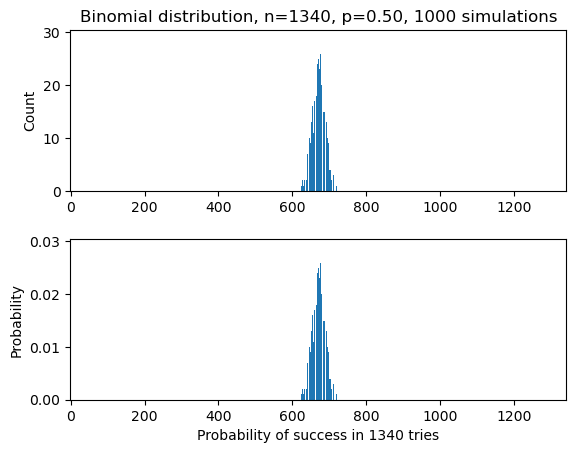

In [121]:
n_simulations = 1000
data = binom.rvs(n_trials, p, size = n_simulations)

counts = collections.Counter(data)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n_trials+1])
plt.title(f'Binomial distribution, n={n_trials}, p={p:.2f}, {n_simulations} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n_trials+1])
plt.xlabel(f'Probability of success in {n_trials} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)